In [1]:
#Cavity Antiresonance example without any use of the implemented indiced funktionalities

In [2]:
using QuantumOptics
using OrdinaryDiffEq
using ModelingToolkit
using LinearAlgebra
using Symbolics
using SymbolicUtils
using DifferentialEquations
using Plots

In [3]:
include("../../src/indexing.jl")
include("../../src/doubleSums.jl")
include("../../src/averageSums.jl")
include("../../src/indexedMeanfield.jl")

isNotIn (generic function with 2 methods)

In [4]:
order = 2
@cnumbers Δc η Δa κ

g(j) = cnumbers(Symbol(g, j))[1]
Γ(i,j) = cnumbers(Symbol(Γ, i, j))[1]
Ω(i,j) = cnumbers(Symbol(Ω, i, j))[1]

N = 2 #number of atoms
hc = FockSpace(:cavity)
ha = ⊗([NLevelSpace(Symbol(:atom,i),2) for i=1:N]...)
h = hc ⊗ ha

@qnumbers a::Destroy(h)
σ(i,j,k) = Transition(h,Symbol("σ_{$k}"),i,j,k+1)

σ (generic function with 1 method)

In [5]:
# Hamiltonian
Hc = Δc*a'a + η*(a' + a)
Ha = Δa*sum(σ(2,2,k) for k=1:N) +
    sum(Ω(i,j)*σ(2,1,i)*σ(1,2,j)*(i≠j) for i=1:N for j=1:N)
Hi = sum(g(k)*(a'σ(1,2,k) + a*σ(2,1,k)) for k=1:N)
H = Hc + Ha + Hi

# Jump operators & and rates
J = [a, [σ(1,2,k) for k=1:N]]
rates = [κ, [Γ(i,j) for i=1:N, j=1:N]]

2-element Vector{Any}:
 κ
 Sym{Parameter, Base.ImmutableDict{DataType, Any}}[Γ11 Γ12 Γ13 Γ14; Γ21 Γ22 Γ23 Γ24; Γ31 Γ32 Γ33 Γ34; Γ41 Γ42 Γ43 Γ44]

In [6]:
ops = [a, σ(2,2,1), σ(1,2,1)]
eqs = meanfield(ops,H,J;rates=rates,order=order)

∂ₜ(⟨a⟩) = (0 - 1im)*η + (0 - 1im)*g1*⟨σ_{1}12⟩ + (0 - 1im)*g3*⟨σ_{3}12⟩ + (0 - 1im)*g2*⟨σ_{2}12⟩ + (0 - 1im)*g4*⟨σ_{4}12⟩ + (0 - 1im)*Δc*⟨a⟩ - 0.5κ*⟨a⟩
∂ₜ(⟨σ_{1}22⟩) = (0 + 1im)*g1*⟨a′*σ_{1}12⟩ + (0 - 1im)*g1*⟨a*σ_{1}21⟩ + (0 - 1im)*Ω12*⟨σ_{1}21*σ_{2}12⟩ + (0 + 1im)*Ω31*⟨σ_{1}12*σ_{3}21⟩ + (0 + 1im)*Ω21*⟨σ_{1}12*σ_{2}21⟩ + (0 + 1im)*Ω41*⟨σ_{1}12*σ_{4}21⟩ + (0 - 1im)*Ω13*⟨σ_{1}21*σ_{3}12⟩ + (0 - 1im)*Ω14*⟨σ_{1}21*σ_{4}12⟩ - Γ11*⟨σ_{1}22⟩ - 0.5Γ12*⟨σ_{1}21*σ_{2}12⟩ - 0.5Γ21*⟨σ_{1}12*σ_{2}21⟩ - 0.5Γ13*⟨σ_{1}21*σ_{3}12⟩ - 0.5Γ14*⟨σ_{1}21*σ_{4}12⟩ - 0.5Γ31*⟨σ_{1}12*σ_{3}21⟩ - 0.5Γ41*⟨σ_{1}12*σ_{4}21⟩
∂ₜ(⟨σ_{1}12⟩) = Γ12*⟨σ_{1}22*σ_{2}12⟩ + Γ13*⟨σ_{1}22*σ_{3}12⟩ + Γ14*⟨σ_{1}22*σ_{4}12⟩ + (0 - 1im)*g1*⟨a⟩ + (0 - 1im)*Δa*⟨σ_{1}12⟩ + (0 - 1im)*Ω12*⟨σ_{2}12⟩ + (0 - 1im)*Ω13*⟨σ_{3}12⟩ + (0 - 1im)*Ω14*⟨σ_{4}12⟩ + (0 + 2im)*g1*⟨a*σ_{1}22⟩ + (0 + 2im)*Ω13*⟨σ_{1}22*σ_{3}12⟩ + (0 + 2im)*Ω12*⟨σ_{1}22*σ_{2}12⟩ + (0 + 2im)*Ω14*⟨σ_{1}22*σ_{4}12⟩ - 0.5Γ11*⟨σ_{1}12⟩ - 0.5Γ12*⟨σ_{2}12⟩ - 0.5Γ13*⟨σ_{3}12⟩ - 0

In [8]:
complete!(eqs)
1

∂ₜ(⟨a⟩) = (0 - 1im)*η + (0 - 1im)*g1*⟨σ_{1}12⟩ + (0 - 1im)*g3*⟨σ_{3}12⟩ + (0 - 1im)*g2*⟨σ_{2}12⟩ + (0 - 1im)*g4*⟨σ_{4}12⟩ + (0 - 1im)*Δc*⟨a⟩ - 0.5κ*⟨a⟩
∂ₜ(⟨σ_{1}22⟩) = (0 + 1im)*g1*⟨a′*σ_{1}12⟩ + (0 - 1im)*g1*⟨a*σ_{1}21⟩ + (0 - 1im)*Ω12*⟨σ_{1}21*σ_{2}12⟩ + (0 + 1im)*Ω31*⟨σ_{1}12*σ_{3}21⟩ + (0 + 1im)*Ω21*⟨σ_{1}12*σ_{2}21⟩ + (0 + 1im)*Ω41*⟨σ_{1}12*σ_{4}21⟩ + (0 - 1im)*Ω13*⟨σ_{1}21*σ_{3}12⟩ + (0 - 1im)*Ω14*⟨σ_{1}21*σ_{4}12⟩ - Γ11*⟨σ_{1}22⟩ - 0.5Γ12*⟨σ_{1}21*σ_{2}12⟩ - 0.5Γ21*⟨σ_{1}12*σ_{2}21⟩ - 0.5Γ13*⟨σ_{1}21*σ_{3}12⟩ - 0.5Γ14*⟨σ_{1}21*σ_{4}12⟩ - 0.5Γ31*⟨σ_{1}12*σ_{3}21⟩ - 0.5Γ41*⟨σ_{1}12*σ_{4}21⟩
∂ₜ(⟨σ_{1}12⟩) = Γ12*⟨σ_{1}22*σ_{2}12⟩ + Γ13*⟨σ_{1}22*σ_{3}12⟩ + Γ14*⟨σ_{1}22*σ_{4}12⟩ + (0 - 1im)*g1*⟨a⟩ + (0 - 1im)*Δa*⟨σ_{1}12⟩ + (0 - 1im)*Ω12*⟨σ_{2}12⟩ + (0 - 1im)*Ω13*⟨σ_{3}12⟩ + (0 - 1im)*Ω14*⟨σ_{4}12⟩ + (0 + 2im)*g1*⟨a*σ_{1}22⟩ + (0 + 2im)*Ω13*⟨σ_{1}22*σ_{3}12⟩ + (0 + 2im)*Ω12*⟨σ_{1}22*σ_{2}12⟩ + (0 + 2im)*Ω14*⟨σ_{1}22*σ_{4}12⟩ - 0.5Γ11*⟨σ_{1}12⟩ - 0.5Γ12*⟨σ_{2}12⟩ - 0.5Γ13*⟨σ_{3}12⟩ - 0

In [11]:
@named sys = ODESystem(eqs)

Model sys with 53 equations
States (53):
  var"⟨a⟩"(t)
  var"⟨σ_{1}22⟩"(t)
  var"⟨σ_{1}12⟩"(t)
  var"⟨σ_{3}12⟩"(t)
  var"⟨σ_{2}12⟩"(t)
  var"⟨σ_{4}12⟩"(t)
⋮
Parameters (36):
  g4
  Δc
  g2
  g1
  η
  κ
⋮

In [12]:
u0 = zeros(ComplexF64, length(eqs))
# parameter
Γ_ = 1.0
d = 2π*0.08 #0.08λ
θ = π/2
Ωij_(i,j) = Γ_*(-3/4)*( (1-(cos(θ))^2)*cos(d)/d-(1-3*(cos(θ))^2)*(sin(d)/(d^2)+(cos(d)/(d^3))) )
function Γij_(i,j)
    i==j ? Γ_ : Γ_*(3/2)*( (1-(cos(θ))^2)*sin(d)/d+(1-3*(cos(θ))^2)*((cos(d)/(d^2))-(sin(d)/(d^3))))
end

g_ = 2Γ_
κ_ = 20Γ_
Δa_ = 0Γ_
Δc_ = 0Γ_
η_ = κ_/100

ps = [Δc, η, Δa, κ, [g(j) for j=1:N]..., [Γ(i,j) for i=1:N for j=1:N]...,
    [Ω(i,j) for i=1:N for j=1:N  if i≠j]...]
p0 = [Δc_, η_, Δa_, κ_, [g_*(-1)^j for j=1:N]...,
    [Γij_(i,j) for i=1:N for j=1:N]..., [Ωij_(i,j) for i=1:N for j=1:N  if i≠j]...]

36-element Vector{Float64}:
  0.0
  0.2
  0.0
 20.0
 -2.0
  2.0
 -2.0
  2.0
  1.0
  0.9501473525049634
  0.9501473525049634
  0.9501473525049634
  0.9501473525049634
  ⋮
  5.297486979766621
  5.297486979766621
  5.297486979766621
  5.297486979766621
  5.297486979766621
  5.297486979766621
  5.297486979766621
  5.297486979766621
  5.297486979766621
  5.297486979766621
  5.297486979766621
  5.297486979766621

In [13]:
Δ_ls = [-10:0.05:10;]Γ_
n_ls = zeros(length(Δ_ls))

for i=1:length(Δ_ls)
    Δc_i = Δ_ls[i]
    Δa_i = Δc_i + Ωij_(1,2) #cavity on resonace with the shifted collective emitter
    p0_i = [Δc_i, η_, Δa_i, κ_, [g_*(-1)^j for j=1:N]..., [Γij_(i,j) for i=1:N for j=1:N]...,
        [Ωij_(i,j) for i=1:N for j=1:N  if i≠j]...]
    prob = ODEProblem(sys,u0,(0.0, 20Γ_), ps.=>p0_i);
    prob_ss = SteadyStateProblem(prob);
    sol_ss = solve(prob_ss, DynamicSS(Tsit5(); abstol=1e-8, reltol=1e-8),
        reltol=1e-14, abstol=1e-14, maxiters=5e7)
    n_ls[i] = abs2(sol_ss[a])
end

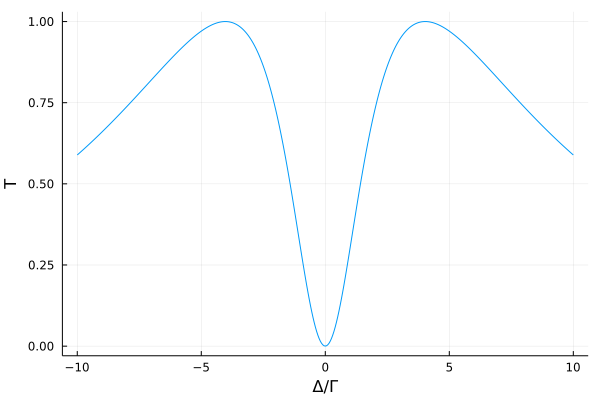

In [14]:
T = n_ls ./ maximum(n_ls)
plot(Δ_ls, T, xlabel="Δ/Γ", ylabel="T", legend=false)